In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\Website_Analytics.csv")
df

,WEBSITE,YEAR,PAGE_PATH,PAGE_URL,PAGE_VIEWS,UNIQUE_VIEWS,AVERAGE_TIME_ON_PAGE_SECONDS,ENTRANCES,BOUNCE_RATE,EXIT_RATE
0,data.brla.gov,2024,/nominate/201174,http://data.brla.gov/nominate/201174,54,54,44.92,0,0.00,0.00
1,www.brla.gov,2020,/1013/about-the-committee,http://www.brla.gov/1013/about-the-committee,64,58,64.43,2417,35.58,43.59
2,www.brla.gov,2023,/723/district-7-lamont-cole,http://www.brla.gov/723/district-7-lamont-cole,99396,85859,80.39,52341,34.21,24.28
3,brgov.com,2014,/dept/finance/rulesregsindex.htm,http://brgov.com/dept/finance/rulesregsindex.htm,871,497,37.30,149,12.04,9.26
4,brgov.com,2018,/dept/brpd/anthraxinfo.htm,http://brgov.com/dept/brpd/anthraxinfo.htm,2,2,3.00,0,0.00,50.00
...,...,...,...,...,...,...,...,...,...,...
62491,brgov.com,2014,/dept/brpd2/news/pdfs/12-16-14_access_device_f...,http://brgov.com/dept/brpd2/news/pdfs/12-16-14...,1,1,3.00,0,0.00,0.00
62492,brgov.com,2017,/dept/dept/,http://brgov.com/dept/dept/,16,15,11.85,100,0.00,26.92
62493,data.brla.gov,2024,/w/3t7g-ia4h/default,http://data.brla.gov/w/3t7g-ia4h/default,59,59,0.25,59,1.00,1.00
62494,www.brla.gov,2023,/2275/employee-self-service-ess,http://www.brla.gov/2275/employee-self-service...,3182,1904,65.00,86,0.16,4.50


## Data Prep Summary

In [4]:
df.drop(["PAGE_PATH","PAGE_URL"],axis=1,inplace=True)
df

,WEBSITE,YEAR,PAGE_VIEWS,UNIQUE_VIEWS,AVERAGE_TIME_ON_PAGE_SECONDS,ENTRANCES,BOUNCE_RATE,EXIT_RATE
0,data.brla.gov,2024,54,54,44.92,0,0.00,0.00
1,www.brla.gov,2020,64,58,64.43,2417,35.58,43.59
2,www.brla.gov,2023,99396,85859,80.39,52341,34.21,24.28
3,brgov.com,2014,871,497,37.30,149,12.04,9.26
4,brgov.com,2018,2,2,3.00,0,0.00,50.00
...,...,...,...,...,...,...,...,...
62491,brgov.com,2014,1,1,3.00,0,0.00,0.00
62492,brgov.com,2017,16,15,11.85,100,0.00,26.92
62493,data.brla.gov,2024,59,59,0.25,59,1.00,1.00
62494,www.brla.gov,2023,3182,1904,65.00,86,0.16,4.50


In [5]:
df.isnull().sum()

WEBSITE                         0
YEAR                            0
PAGE_VIEWS                      0
UNIQUE_VIEWS                    0
AVERAGE_TIME_ON_PAGE_SECONDS    0
ENTRANCES                       0
BOUNCE_RATE                     0
EXIT_RATE                       0
dtype: int64

In [6]:
df.dtypes

WEBSITE                          object
YEAR                              int64
PAGE_VIEWS                        int64
UNIQUE_VIEWS                      int64
AVERAGE_TIME_ON_PAGE_SECONDS    float64
ENTRANCES                         int64
BOUNCE_RATE                     float64
EXIT_RATE                       float64
dtype: object

In [7]:
df.duplicated().sum()

17139

In [8]:
df.drop_duplicates(inplace=True)
df

,WEBSITE,YEAR,PAGE_VIEWS,UNIQUE_VIEWS,AVERAGE_TIME_ON_PAGE_SECONDS,ENTRANCES,BOUNCE_RATE,EXIT_RATE
0,data.brla.gov,2024,54,54,44.92,0,0.00,0.00
1,www.brla.gov,2020,64,58,64.43,2417,35.58,43.59
2,www.brla.gov,2023,99396,85859,80.39,52341,34.21,24.28
3,brgov.com,2014,871,497,37.30,149,12.04,9.26
4,brgov.com,2018,2,2,3.00,0,0.00,50.00
...,...,...,...,...,...,...,...,...
62489,brgov.com,2014,14,13,41.05,233,0.00,18.33
62490,www.brla.gov,2019,9678,7667,40.21,10365,29.30,19.80
62492,brgov.com,2017,16,15,11.85,100,0.00,26.92
62494,www.brla.gov,2023,3182,1904,65.00,86,0.16,4.50


In [9]:
df.shape

(45357, 8)

## Exploratory Data Analysis (EDA)

### Correlation heatmap

In [12]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

In [13]:
# Compute correlation matrix
corr = numeric_df.corr()

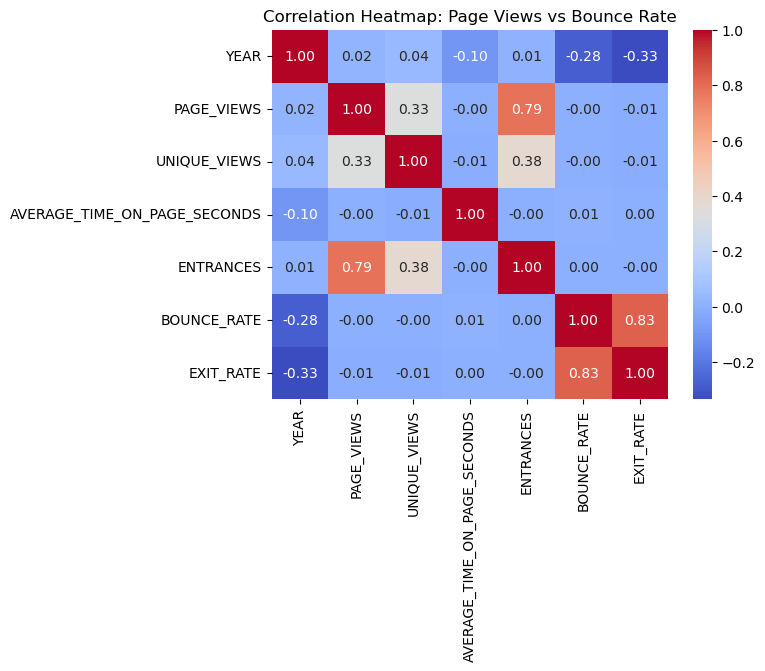

In [14]:

# Create heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Page Views vs Bounce Rate")
plt.show()

In [15]:
website_summary = df.groupby('WEBSITE').agg({
    'PAGE_VIEWS': 'sum',
    'UNIQUE_VIEWS': 'sum',
    'ENTRANCES': 'sum',
    'AVERAGE_TIME_ON_PAGE_SECONDS': 'mean',
    'BOUNCE_RATE': 'mean',
    'EXIT_RATE': 'mean'
}).reset_index()


In [16]:
website_summary

,WEBSITE,PAGE_VIEWS,UNIQUE_VIEWS,ENTRANCES,AVERAGE_TIME_ON_PAGE_SECONDS,BOUNCE_RATE,EXIT_RATE
0,311.brla.gov,700000,574466,673471,98.668571,57.324286,56.172571
1,brgov.com,15203257,10364290,8163802,80.303044,19.880070,26.387656
2,budget.brla.gov,123674,97499,166873,33.151906,1.389991,7.720223
3,checkbook.brla.gov,181345,142214,181053,19.346667,1.000000,1.000000
4,city.brla.gov,720819084,47365930,413842398,57.579776,25.867463,34.696368
5,data.brla.gov,12431022,8782928,10818948,76.851203,7.600852,11.751256
6,data.ebrgis.opendata.arcgis.com,10561,5606,2531,125.252787,4.746721,22.426066
7,gis.brla.gov,897621,546746,5219722,98.552276,27.357862,40.775931
8,gisdata.brla.gov,2369796,424138,442177,9.049006,0.306443,0.339856
9,my.brla.gov,3913983,2220484,5324978,59.130303,9.918061,30.410970


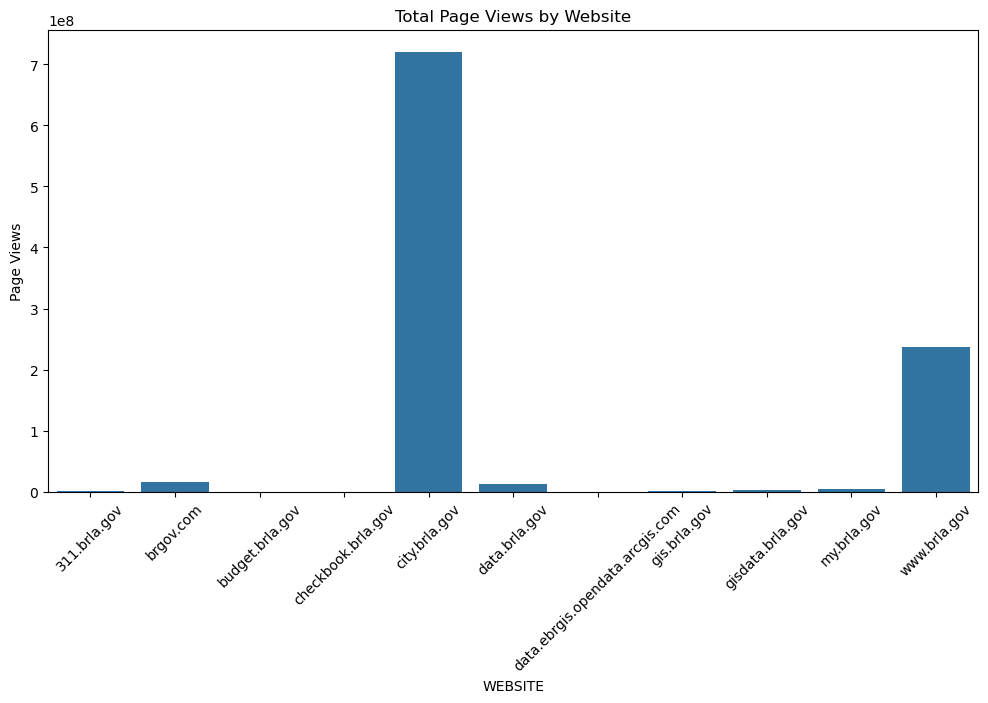

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(data=website_summary, x='WEBSITE', y='PAGE_VIEWS')
plt.title("Total Page Views by Website")
plt.xticks(rotation=45)
plt.ylabel("Page Views")
plt.show()

In [18]:
yearly_summary = df.groupby('YEAR').agg({
    'PAGE_VIEWS': 'sum',
    'UNIQUE_VIEWS': 'sum',
    'ENTRANCES': 'sum',
    'AVERAGE_TIME_ON_PAGE_SECONDS': 'mean',
    'BOUNCE_RATE': 'mean',
    'EXIT_RATE': 'mean'
}).reset_index()


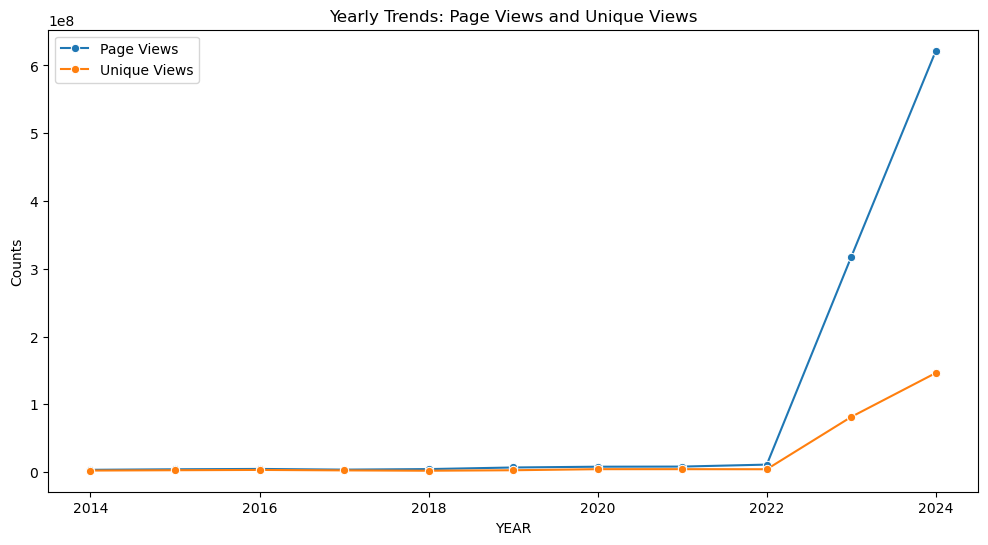

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_summary, x='YEAR', y='PAGE_VIEWS', marker='o', label='Page Views')
sns.lineplot(data=yearly_summary, x='YEAR', y='UNIQUE_VIEWS', marker='o', label='Unique Views')
plt.title("Yearly Trends: Page Views and Unique Views")
plt.ylabel("Counts")
plt.legend()
plt.show()


In [20]:
# Set the visual style
sns.set(style="whitegrid")

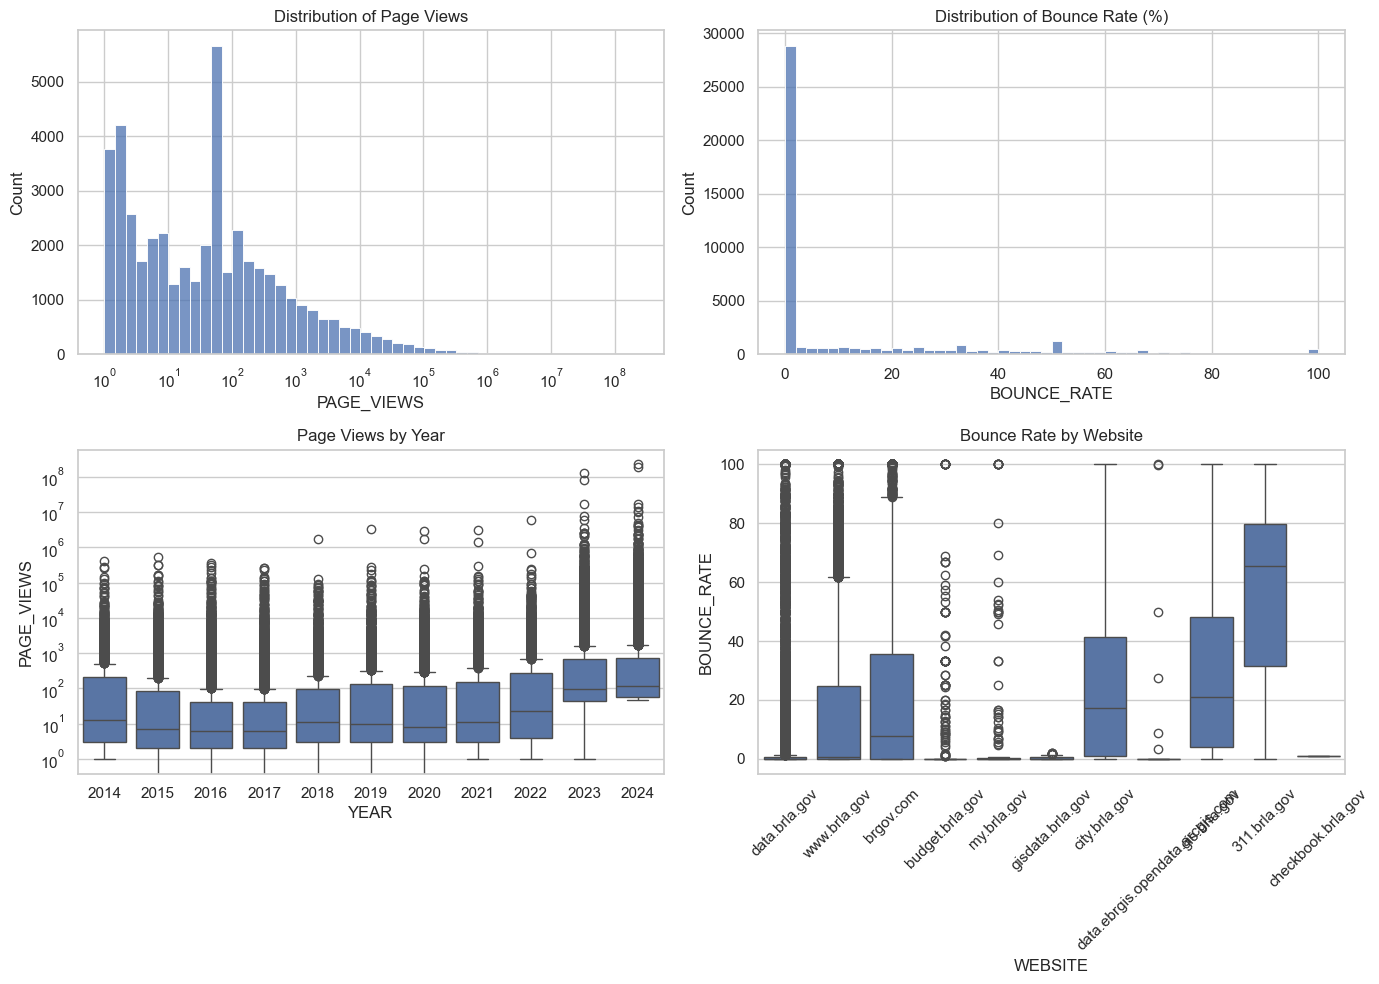

In [21]:
# Plot distributions of key metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['PAGE_VIEWS'], bins=50, ax=axes[0, 0], log_scale=True)
axes[0, 0].set_title('Distribution of Page Views')
sns.histplot(df['BOUNCE_RATE'], bins=50, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Bounce Rate (%)')

sns.boxplot(data=df, x='YEAR', y='PAGE_VIEWS', ax=axes[1, 0])
axes[1, 0].set_title('Page Views by Year')
axes[1, 0].set_yscale('log')

sns.boxplot(data=df, x='WEBSITE', y='BOUNCE_RATE', ax=axes[1, 1])
axes[1, 1].set_title('Bounce Rate by Website')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Feature Engineering

In [23]:
dff=df

In [24]:
dff.head(4)

,WEBSITE,YEAR,PAGE_VIEWS,UNIQUE_VIEWS,AVERAGE_TIME_ON_PAGE_SECONDS,ENTRANCES,BOUNCE_RATE,EXIT_RATE
0,data.brla.gov,2024,54,54,44.92,0,0.00,0.00
1,www.brla.gov,2020,64,58,64.43,2417,35.58,43.59
2,www.brla.gov,2023,99396,85859,80.39,52341,34.21,24.28
3,brgov.com,2014,871,497,37.30,149,12.04,9.26


In [25]:
dff["WEBSITE"]

0        data.brla.gov
1         www.brla.gov
2         www.brla.gov
3            brgov.com
4            brgov.com
             ...      
62489        brgov.com
62490     www.brla.gov
62492        brgov.com
62494     www.brla.gov
62495     www.brla.gov
Name: WEBSITE, Length: 45357, dtype: object

In [26]:
dff.head(4)

,WEBSITE,YEAR,PAGE_VIEWS,UNIQUE_VIEWS,AVERAGE_TIME_ON_PAGE_SECONDS,ENTRANCES,BOUNCE_RATE,EXIT_RATE
0,data.brla.gov,2024,54,54,44.92,0,0.00,0.00
1,www.brla.gov,2020,64,58,64.43,2417,35.58,43.59
2,www.brla.gov,2023,99396,85859,80.39,52341,34.21,24.28
3,brgov.com,2014,871,497,37.30,149,12.04,9.26


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
encode=LabelEncoder()

In [29]:
dff["WEBSITE"]=encode.fit_transform(dff["WEBSITE"])

In [30]:
dff

,WEBSITE,YEAR,PAGE_VIEWS,UNIQUE_VIEWS,AVERAGE_TIME_ON_PAGE_SECONDS,ENTRANCES,BOUNCE_RATE,EXIT_RATE
0,5,2024,54,54,44.92,0,0.00,0.00
1,10,2020,64,58,64.43,2417,35.58,43.59
2,10,2023,99396,85859,80.39,52341,34.21,24.28
3,1,2014,871,497,37.30,149,12.04,9.26
4,1,2018,2,2,3.00,0,0.00,50.00
...,...,...,...,...,...,...,...,...
62489,1,2014,14,13,41.05,233,0.00,18.33
62490,10,2019,9678,7667,40.21,10365,29.30,19.80
62492,1,2017,16,15,11.85,100,0.00,26.92
62494,10,2023,3182,1904,65.00,86,0.16,4.50


In [31]:
#HIGH_BOUNCE = 1 if BOUNCE_RATE > 50, else 0

In [32]:
df['HIGH_BOUNCE'] = (df['BOUNCE_RATE'] > 30).astype(int)

In [33]:
#want to predict 'BOUNCE_RATE(%)'
x= df.drop(columns=["BOUNCE_RATE","HIGH_BOUNCE"])
x

,WEBSITE,YEAR,PAGE_VIEWS,UNIQUE_VIEWS,AVERAGE_TIME_ON_PAGE_SECONDS,ENTRANCES,EXIT_RATE
0,5,2024,54,54,44.92,0,0.00
1,10,2020,64,58,64.43,2417,43.59
2,10,2023,99396,85859,80.39,52341,24.28
3,1,2014,871,497,37.30,149,9.26
4,1,2018,2,2,3.00,0,50.00
...,...,...,...,...,...,...,...
62489,1,2014,14,13,41.05,233,18.33
62490,10,2019,9678,7667,40.21,10365,19.80
62492,1,2017,16,15,11.85,100,26.92
62494,10,2023,3182,1904,65.00,86,4.50


In [34]:
y = df["HIGH_BOUNCE"]
y

0        0
1        1
2        1
3        0
4        0
        ..
62489    0
62490    0
62492    0
62494    0
62495    0
Name: HIGH_BOUNCE, Length: 45357, dtype: int32

## Modeling

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12)

In [38]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((36285, 7), (9072, 7), (36285,), (9072,))

In [39]:
#build the model 
lr=LogisticRegression()
#train the model 
lr.fit(x_train,y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
#training accuracy
y_train_pred=lr.predict(x_train)

In [41]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve, roc_auc_score

In [42]:
confusion_matrix(y_train,y_train_pred)

array([[27314,  1826],
       [ 2121,  5024]], dtype=int64)

In [43]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     29140
           1       0.73      0.70      0.72      7145

    accuracy                           0.89     36285
   macro avg       0.83      0.82      0.83     36285
weighted avg       0.89      0.89      0.89     36285



In [44]:
#test Accuracy
y_test_pred=lr.predict(x_test)

In [45]:
confusion_matrix(y_test,y_test_pred)

array([[6825,  453],
       [ 540, 1254]], dtype=int64)

In [46]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7278
           1       0.73      0.70      0.72      1794

    accuracy                           0.89      9072
   macro avg       0.83      0.82      0.82      9072
weighted avg       0.89      0.89      0.89      9072



In [47]:
# Predict probabilities
y_pred_proba = lr.predict_proba(x_test)[:, 1]

In [48]:
# Calculate ROC AUC
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)

AUC Score: 0.9540666071724531


In [49]:
from xgboost import XGBClassifier

In [50]:

# Initialize model
model = XGBClassifier()

In [51]:
# Train
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [52]:
# Predict
y_pred = model.predict(x_test)

In [53]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9539241622574955

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      7278
           1       0.89      0.88      0.88      1794

    accuracy                           0.95      9072
   macro avg       0.93      0.93      0.93      9072
weighted avg       0.95      0.95      0.95      9072



In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

In [55]:
# Predict probabilities instead of hard labels
y_pred_proba = model.predict_proba(x_test)[:, 1]

In [56]:
# Calculate ROC AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)


AUC Score: 0.9892212691506573


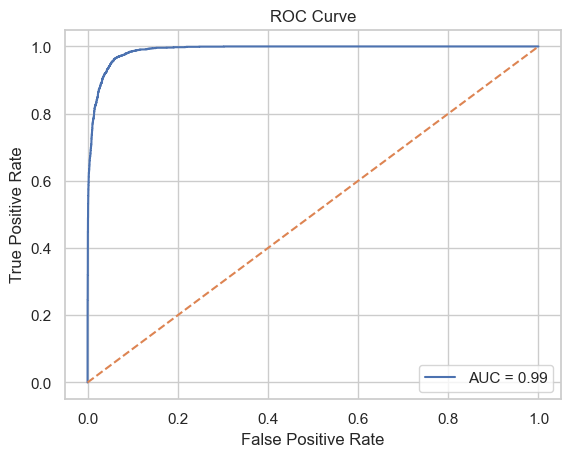

In [57]:
#Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [58]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [59]:
!pip install streamlit

In [60]:
dff.dtypes

WEBSITE                           int32
YEAR                              int64
PAGE_VIEWS                        int64
UNIQUE_VIEWS                      int64
AVERAGE_TIME_ON_PAGE_SECONDS    float64
ENTRANCES                         int64
BOUNCE_RATE                     float64
EXIT_RATE                       float64
HIGH_BOUNCE                       int32
dtype: object